# Assignment 4
#### Linear Time Iteration - Not for handing in

In this assignment you will use the linear time algorithm that was introduced in the tutorial to calculate the minimum state variable (MSV) solution of the New Keynesian model that we studied over the last weeks.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plot = plt.plot
from scipy.optimize import fsolve

# parameter specifications
sigma= 2
kappa=0.3
beta=0.99
phi1=1.5
phi2=0.2

1) Assuming that e_t is white noise, we have three variables in our system of equations that we apply the linear time iteration algorithm on.

2) what happens if we set F = Fnew and apply the formula again?

3) Interpret first colum of Q.

In [3]:
A = np.array([[1, 0, 1/sigma], 
                [-kappa, 1, 0],
                [0, 0, 1]])

M = np.array([[1,1/sigma,0],
             [0,beta,0],
             [phi2,phi1,0]])

D = np.zeros((3,3))

# initial guess:
F = np.ones((3,3))
Fnew = np.zeros((3,3))

Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)
print(Fnew)

F = Fnew
Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)
print(Fnew) # still zeros

#formula from lecture 8 slide 12
Q = np.linalg.inv(A - np.dot(M,Fnew))
print(Q)

# 3) first colum interpreted as result of output cap shock in MVS like C1 factor from last week

# General solution of the form:
# z_t = F z_{t-1} + Q u_t



[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 1.    0.   -0.5 ]
 [ 0.3   1.   -0.15]
 [ 0.    0.    1.  ]]


Next: autocorrelated shock: autocorrelation coefficient rho = 0.8
4) extend matrices to allow for autocorrelated shocks

5) Write while loop that repeats linear time iteration until Fnew and F are sufficiently close (e.g. 0.000001)

6)


In [5]:
rho_e = 0.8 # persistence in output gap shock

A=np.array([[1,0,0,0],
            [-1,1,0,1/sigma],
            [0,-kappa,1,0],
            [0,0,0,1]
            ])

M = np.array([ [0,0,0,0],
                [0,0,1/sigma,0],
                [0,0,beta,0],
                [0,phi2,phi1,0]
            ])

D = np.zeros((4,4))
D[0,0] = rho_e

# initial guess
F=np.ones((4,4))
Fnew = np.zeros((4,4))
Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)
print(Fnew)

F = Fnew
Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)
print(Fnew)

while np.max(np.abs(F-Fnew)) > 0.000001:
    F=Fnew
    Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)

print('final Fnew: \n', Fnew)
Q = np.linalg.inv(A-np.dot(M,Fnew))
print('Q: \n' ,Q)


[[ 0.8         0.          0.          0.        ]
 [ 1.32145749  0.          0.          0.        ]
 [-1.07854251  0.          0.          0.        ]
 [-2.53279352  0.          0.          0.        ]]
[[ 0.8         0.          0.          0.        ]
 [ 0.9099919   0.          0.          0.        ]
 [-0.5812081   0.          0.          0.        ]
 [-1.08281781  0.          0.          0.        ]]
final Fnew: 
 [[0.8        0.         0.         0.        ]
 [0.58459849 0.         0.         0.        ]
 [0.84316869 0.         0.         0.        ]
 [1.10533751 0.         0.         0.        ]]
Q: 
 [[ 1.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.17146376e-16]
 [ 7.30747979e-01  1.00000000e+00 -0.00000000e+00 -5.00000000e-01]
 [ 1.05396140e+00  3.00000000e-01  1.00000000e+00 -1.50000000e-01]
 [ 1.38167273e+00 -1.53396488e-16  0.00000000e+00  1.00000000e+00]]


In [6]:
# change rho
rho_e = 0.1 # persistence in output gap shock

A=np.array([[1,0,0,0],
            [-1,1,0,1/sigma],
            [0,-kappa,1,0],
            [0,0,0,1]
            ])

M = np.array([ [0,0,0,0],
                [0,0,1/sigma,0],
                [0,0,beta,0],
                [0,phi2,phi1,0]
            ])

D = np.zeros((4,4))
D[0,0] = rho_e

# initial guess
F=np.ones((4,4))
Fnew = np.zeros((4,4))
Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)
print(Fnew)

F = Fnew
Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)
print(Fnew)

while np.max(np.abs(F-Fnew)) > 0.000001:
    F=Fnew
    Fnew = np.dot(np.linalg.inv(A-np.dot(M,F)),D)

print('final Fnew: \n', Fnew)
Q = np.linalg.inv(A-np.dot(M,Fnew))
print('Q: \n' ,Q)


[[ 0.1         0.          0.          0.        ]
 [ 0.16518219  0.          0.          0.        ]
 [-0.13481781  0.          0.          0.        ]
 [-0.31659919  0.          0.          0.        ]]
[[ 0.1         0.          0.          0.        ]
 [ 0.10171862  0.          0.          0.        ]
 [ 0.01716862  0.          0.          0.        ]
 [-0.01691903  0.          0.          0.        ]]
final Fnew: 
 [[0.1        0.         0.         0.        ]
 [0.09820057 0.         0.         0.        ]
 [0.03269718 0.         0.         0.        ]
 [0.00686857 0.         0.         0.        ]]
Q: 
 [[ 1.         -0.         -0.         -0.        ]
 [ 0.98200565  1.          0.         -0.5       ]
 [ 0.3269719   0.3         1.         -0.15      ]
 [ 0.06868589  0.          0.          1.        ]]


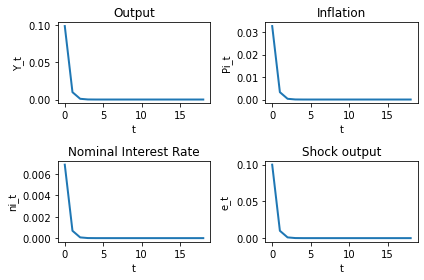

In [11]:
# impulse responses of shock to output gap and inflation
C1 = Q[ :,0]
C5 = F[ :,0]

N = 20 # simulate 20 periods
epsilon_e = np.zeros(N)
e = np.zeros(N)
Y = np.zeros(N)
Pi = np.zeros(N)
ni = np.zeros(N) #nominal interest rate

epsilon_e[0] = 0.01

for i in range(N):
    [e[i],Y[i],Pi[i],ni[i]] = [C1[hh]*epsilon_e[i] +C5[hh]*e[i-1] for hh in range(4)] #list comprehension

fig = plt.figure()
plt.subplot(2,2,1)
plot([Y[i]*100 for i in range(1,N)], linewidth = 2)
plt.title('Output')
plt.ylabel('Y_t')
plt.xlabel('t')

plt.subplot(2,2,2)
plot([Pi[i]*100 for i in range(1,N)], linewidth = 2)
plt.title('Inflation')
plt.ylabel('Pi_t')
plt.xlabel('t')

plt.subplot(2,2,3)
plot([ni[i]*100 for i in range(1,N)], linewidth = 2)
plt.title('Nominal Interest Rate')
plt.ylabel('ni_t')
plt.xlabel('t')

plt.subplot(2,2,4)
plot([e[i]*100 for i in range(1,N)], linewidth = 2)
plt.title('Shock output')
plt.ylabel('e_t')
plt.xlabel('t')

plt.tight_layout()
